<a href="https://colab.research.google.com/github/AbbyHoyt/KWK-Goldman-Sachs-ML-Final-Project/blob/main/Abby_Hoyt_KWK_Machine_Learning_x_Finance_Challenge_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Loan Approval According to Demographics and Financial Standing
---

## ⚠️ Agreement Not to Use AI Tools in This Text Cell

By completing this text cell, you confirm that **you did not use any AI tools or large language models (LLMs) to generate text, code, or analysis for its content**.  

*Purpose:* This ensures that your insights, reasoning, and work in this section are fully your own.  

**Please write your responses/code manually.**

-----------------

## Research Question / Problem Statement
How do demographics and financial standing affect the likelihood of an individual getting a home loan approved?

-----------------

## List of Datasets
**Home Loan Approval by Rushikesh Konapure**

* **Source:** The dataset is available on Kaggle [here](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_test.cs).

* **Brief Description:** The dataset includes information about loan applicant demographics (such as age, gender, marital status, education level, number of dependents, etc.) as well as financial information.

* **Why I Chose This Dataset:** I chose to use this dataset because it had a high usability score, the data was in available in a CSV format, and the number of features/columns available seemed large enough to draw valuable conclusions without being too difficult to work with.
-----------------

## Summary of Dataset Use

**Instructions:** For each model you train, fill out the following section (template to copy/pase is below this list):
1.  Model type (e.g. linear regression)
2.  Dataset(s) used
3.  The metric(s) you used to evaluate the model (e.g. accuracy, f1 score, R-squared, RMSE, feature importance)
4.  The key insight(s) you discovered through training and evaluating your model.
5.  Did you use AI or LLMs to support your work on this model? If so, briefly, what did you use them for? (e.g. code generation, asking conceptual questions, etc.)

#### Model 1
*   **Model type**:

*   **Dataset(s) used**:

*   **Metric(s) used**:

*   **Key insight(s)**:

*   **AI/LLM use (if any)**:

#### Model 2
*   **Model type**:

*   **Dataset(s) used**:

*   **Metric(s) used**:

*   **Key insight(s)**:

*   **AI/LLM use (if any)**:

#### (Model 3, 4, etc. ...)

-----------------

## Overall AI/LLM Usage
**Instructions:** If you used AI or LLM tools during any part of the learning or project process, please describe your overall uses here. This may include using AI tools as a tutor, to understand code, to fix bugs, or to generate code.

[Text here - 2-4 sentences]

-----------------

## Results
[Text here - 5-10 sentences]

-----------------

## Conclusion and Recommendations
[Text here - 5-8 sentences]

-----------------

## References
**1. Rename Columns in Pandas Dataframe from GeeksforGeeks**

* **Source:** https://www.geeksforgeeks.org/pandas/how-to-rename-columns-in-pandas-dataframe/
* **Use:** Referenced example code showing how to change the name case of  columns in a pandas dataframe.

<br>

**2. Display/Render an HTML File Inside Jupyter Notebook on Google Colab Platform from StackOverflow**

* **Source:** https://stackoverflow.com/questions/51576756/display-render-an-html-file-inside-jupyter-notebook-on-google-colab-platform
* **Use:** Referenced example code showing how to use HTML code inside of a Jupyter notebook file.

<br>

**3. Color Palette from Coolors**

* **Source:** https://colorhunt.co/palette/f6b1ce1581bf3db6b1cce5cf
* **Use:** Used HEX codes for colors in HTML sections of code.

<br>

**4. List of Named Colors from Matplotlib**

* **Source:** https://matplotlib.org/3.1.1/gallery/color/named_colors.html
* **Use:** Used color names to style Matplotlib graphs.

---

In [97]:
import IPython
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Load Data and Mount to Google Drive</h1>")

In [98]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from scipy import stats

df = pd.read_csv("/content/drive/My Drive/KWK_ML/loan_sanction_test.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [100]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Rename Columns for Name Case Consistency</h3>")

In [101]:
df = df.rename(columns={'Loan_ID': 'LoanID', 'Self_Employed': 'SelfEmployed', 'Loan_Amount_Term': 'LoanAmountTerm', 'Credit_History': 'CreditHistory', 'Property_Area': 'PropertyArea'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   SelfEmployed       344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   LoanAmountTerm     361 non-null    float64
 10  CreditHistory      338 non-null    float64
 11  PropertyArea       367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [102]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Exploratory Data Analysis</h1>")

In [103]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Central Tendency of Numeric Features</h3>")

In [104]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

for col in cols:
  print(f"{col}")

  # Calculate mean.
  mean = df[col].mean()
  print(f"  * Mean: {mean}")

  # Calculate median.
  median = df[col].median()
  print(f"  * Median: {median}")

  # Calculate mode.
  mode_result = stats.mode(df[col], keepdims = True)
  mode = mode_result.mode[0]
  mode_count = mode_result.count[0]
  print(f"  * Mode: {mode} appeared {mode_count} times")

  print()

ApplicantIncome
  * Mean: 4805.599455040872
  * Median: 3786.0
  * Mode: 3500 appeared 6 times

CoapplicantIncome
  * Mean: 1569.5776566757493
  * Median: 1025.0
  * Mode: 0 appeared 156 times

LoanAmount
  * Mean: 136.13259668508286
  * Median: 125.0
  * Mode: 150.0 appeared 12 times

LoanAmountTerm
  * Mean: 342.53739612188366
  * Median: 360.0
  * Mode: 360.0 appeared 311 times

CreditHistory
  * Mean: 0.8254437869822485
  * Median: 1.0
  * Mode: 1.0 appeared 279 times



In [105]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Spread and Variation of Numeric Features</h3>")

In [106]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

for col in cols:
  print(f"{col}")

  # Calculate minimum.
  min = df[col].min()
  print(f"  * Minimum: {min}")

  # Calculate maximum.
  max = df[col].max()
  print(f"  * Maximum: {max}")

  # Calculate range.
  range = max - min
  print(f"  * Range: {range}")

  # Calculate interquartile range (IQR).
  quartile_3 = df[col].quantile(0.75)
  quartile_1 = df[col].quantile(0.25)
  iqr = quartile_3 - quartile_1
  print(f"  * IQR: {iqr}")

  # Calculate standard deviation.
  standard_deviation = df[col].std()
  print(f"  * Standard Deviation: {standard_deviation}")

  print()

ApplicantIncome
  * Minimum: 0
  * Maximum: 72529
  * Range: 72529
  * IQR: 2196.0
  * Standard Deviation: 4910.685398980398

CoapplicantIncome
  * Minimum: 0
  * Maximum: 24000
  * Range: 24000
  * IQR: 2430.5
  * Standard Deviation: 2334.2320986863465

LoanAmount
  * Minimum: 28.0
  * Maximum: 550.0
  * Range: 522.0
  * IQR: 57.75
  * Standard Deviation: 61.366652393018214

LoanAmountTerm
  * Minimum: 6.0
  * Maximum: 480.0
  * Range: 474.0
  * IQR: 0.0
  * Standard Deviation: 65.1566434139972

CreditHistory
  * Minimum: 0.0
  * Maximum: 1.0
  * Range: 1.0
  * IQR: 0.0
  * Standard Deviation: 0.380149835491471



In [107]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Visualizations of Spread</h3>")

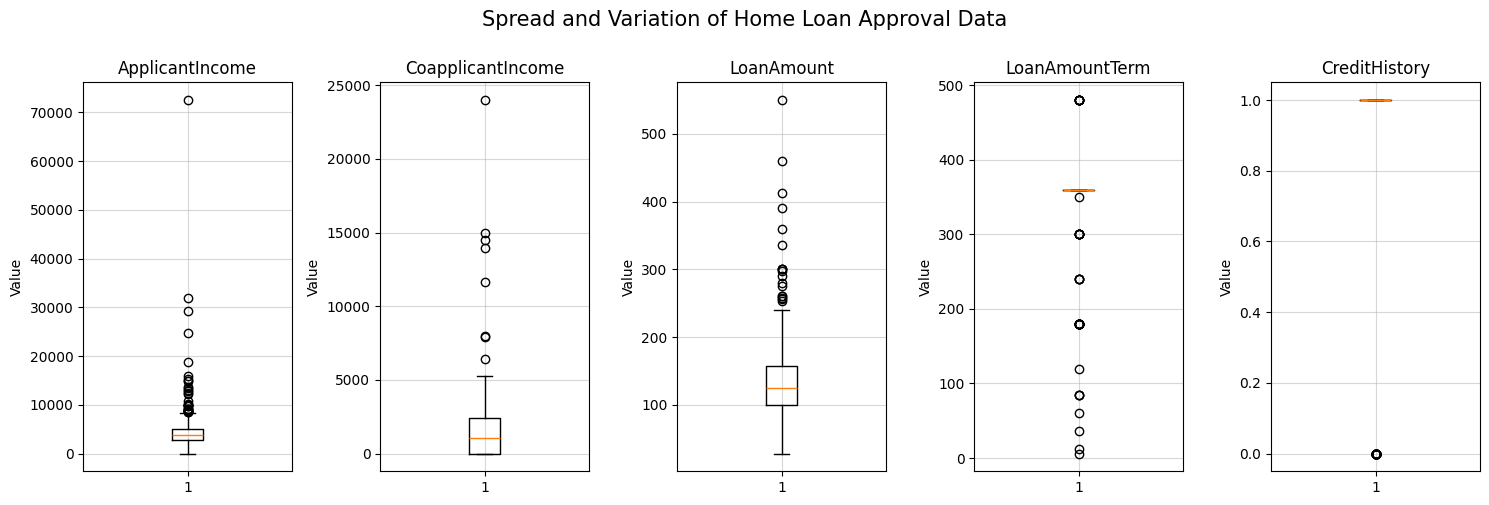

In [108]:
import matplotlib.pyplot as plt

cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

# Create a boxplot for each column.
for i, col in enumerate(cols):
  axes[i].boxplot(df[col].dropna(), vert = True)
  axes[i].set_title(col)
  axes[i].set_ylabel("Value")
  axes[i].grid(True, linestyle = "-", alpha = 0.5)

# Display boxplots.
plt.suptitle("Spread and Variation of Home Loan Approval Data", fontsize = 15, y = 1)
plt.tight_layout()
plt.show()

In [109]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Correlation Matrix</h3>")

In [110]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

# Display correlation matrix.
df[cols].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
LoanAmountTerm,0.023249,-0.010984,0.094950,1.000000,-0.053593
CreditHistory,0.099553,-0.071235,-0.012578,-0.053593,1.000000


---

In [111]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Clean Data</h1>")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   SelfEmployed       344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   LoanAmountTerm     361 non-null    float64
 10  CreditHistory      338 non-null    float64
 11  PropertyArea       367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [113]:
# Fill missing numeric values with median.
median_loan_amount = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(median_loan_amount)

median_loan_amount_term = df['LoanAmountTerm'].median()
df['LoanAmountTerm'] = df['LoanAmountTerm'].fillna(median_loan_amount_term)

median_credit_history = df['CreditHistory'].median()
df['CreditHistory'] = df['CreditHistory'].fillna(median_credit_history)

# Fill missing non-numeric values with mode.
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_gender)

mode_dependents = df['Dependents'].mode()[0]
df['Dependents'] = df['Dependents'].fillna(mode_dependents)

mode_self_employed = df['SelfEmployed'].mode()[0]
df['SelfEmployed'] = df['SelfEmployed'].fillna(mode_self_employed)

mode_property_area = df['PropertyArea'].mode()[0]
df['PropertyArea'] = df['PropertyArea'].fillna(mode_property_area)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   SelfEmployed       367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   LoanAmountTerm     367 non-null    float64
 10  CreditHistory      367 non-null    float64
 11  PropertyArea       367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [114]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Model #1: Linear Regression</h1>")

In [115]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Amount vs. Applicant Income Model</h3>")

Coefficient (Slope): 0.005862780741177709
Intercept: 105.1858164978222
Mean Squared Error: 3066.103512551048
R^2 Score: 0.11806292831091614



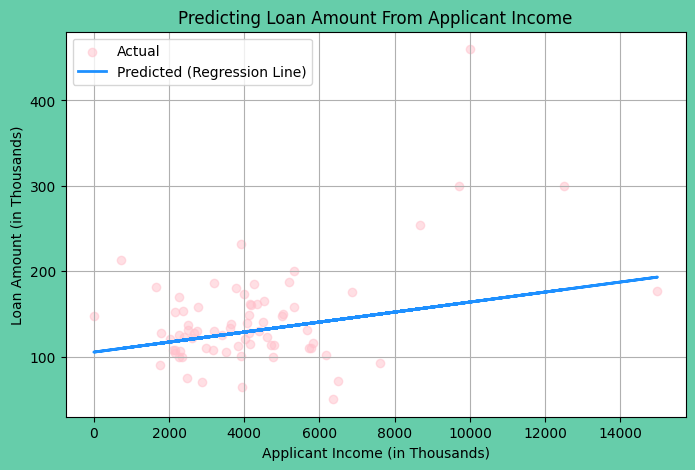

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features.
X = df[['ApplicantIncome']]

# Define target.
y = df['LoanAmount']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Amount From Applicant Income")
plt.xlabel("Applicant Income (in Thousands)")
plt.ylabel("Loan Amount (in Thousands)")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Amount Term vs. Applicant Income Model</h3>")

Coefficient (Slope): 0.0004007749956419587
Intercept: 338.95616677543336
Mean Squared Error: 3601.422429030373
R^2 Score: -0.02741254174847474



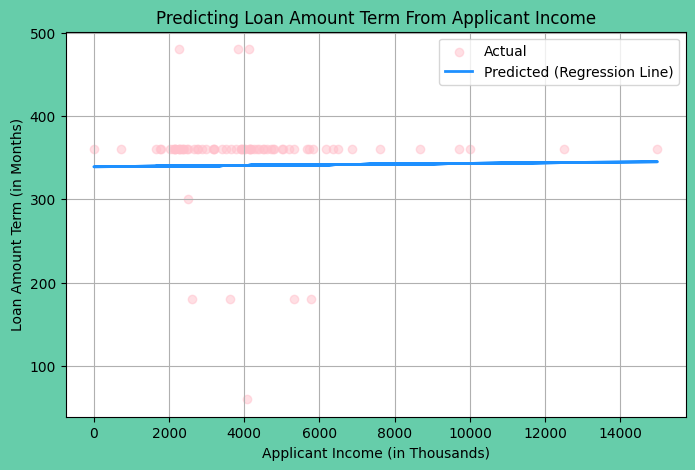

In [118]:
# Define features.
X = df[['ApplicantIncome']]

# Define target.
y = df['LoanAmountTerm']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Amount Term From Applicant Income")
plt.xlabel("Applicant Income (in Thousands)")
plt.ylabel("Loan Amount Term (in Months)")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Model #2: Decision Tree</h1>")

In [120]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Create New Columns With Mapped Numerical Values</h3>")

In [121]:
print("Categorical Column Values:")

# Create a Gender_Female column.
print(set(df['Gender'].values))
df['Gender_Female'] = df['Gender'].map({'No': 0, 'Yes': 1})

# Create a Married_Yes column.
print(set(df['Married'].values))
df['Married_Yes'] = df['Married'].map({'No': 0, 'Yes': 1})

# Create an Education_Graduate column.
print(set(df['Education'].values))
df['Education_Graduate'] = df['Education'].map({'No': 0, 'Yes': 1})

# Create a SelfEmployed_Yes column.
print(set(df['SelfEmployed'].values))
df['SelfEmployed_Yes'] = df['SelfEmployed'].map({'No': 0, 'Yes': 1})

# Create a UrbanSemiurban_Yes column.
print(set(df['PropertyArea'].values))
df['UrbanSemiurban_Yes'] = df['PropertyArea'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 1})

print()

# Display updated dataframe with new columns.
df.info()

Categorical Column Values:
{'Male', 'Female'}
{'Yes', 'No'}
{'Not Graduate', 'Graduate'}
{'Yes', 'No'}
{'Semiurban', 'Rural', 'Urban'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LoanID              367 non-null    object 
 1   Gender              367 non-null    object 
 2   Married             367 non-null    object 
 3   Dependents          367 non-null    object 
 4   Education           367 non-null    object 
 5   SelfEmployed        367 non-null    object 
 6   ApplicantIncome     367 non-null    int64  
 7   CoapplicantIncome   367 non-null    int64  
 8   LoanAmount          367 non-null    float64
 9   LoanAmountTerm      367 non-null    float64
 10  CreditHistory       367 non-null    float64
 11  PropertyArea        367 non-null    object 
 12  Gender_Female       0 non-null      float64
 13  Married_Yes        

In [144]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Categorical Features</h3>")

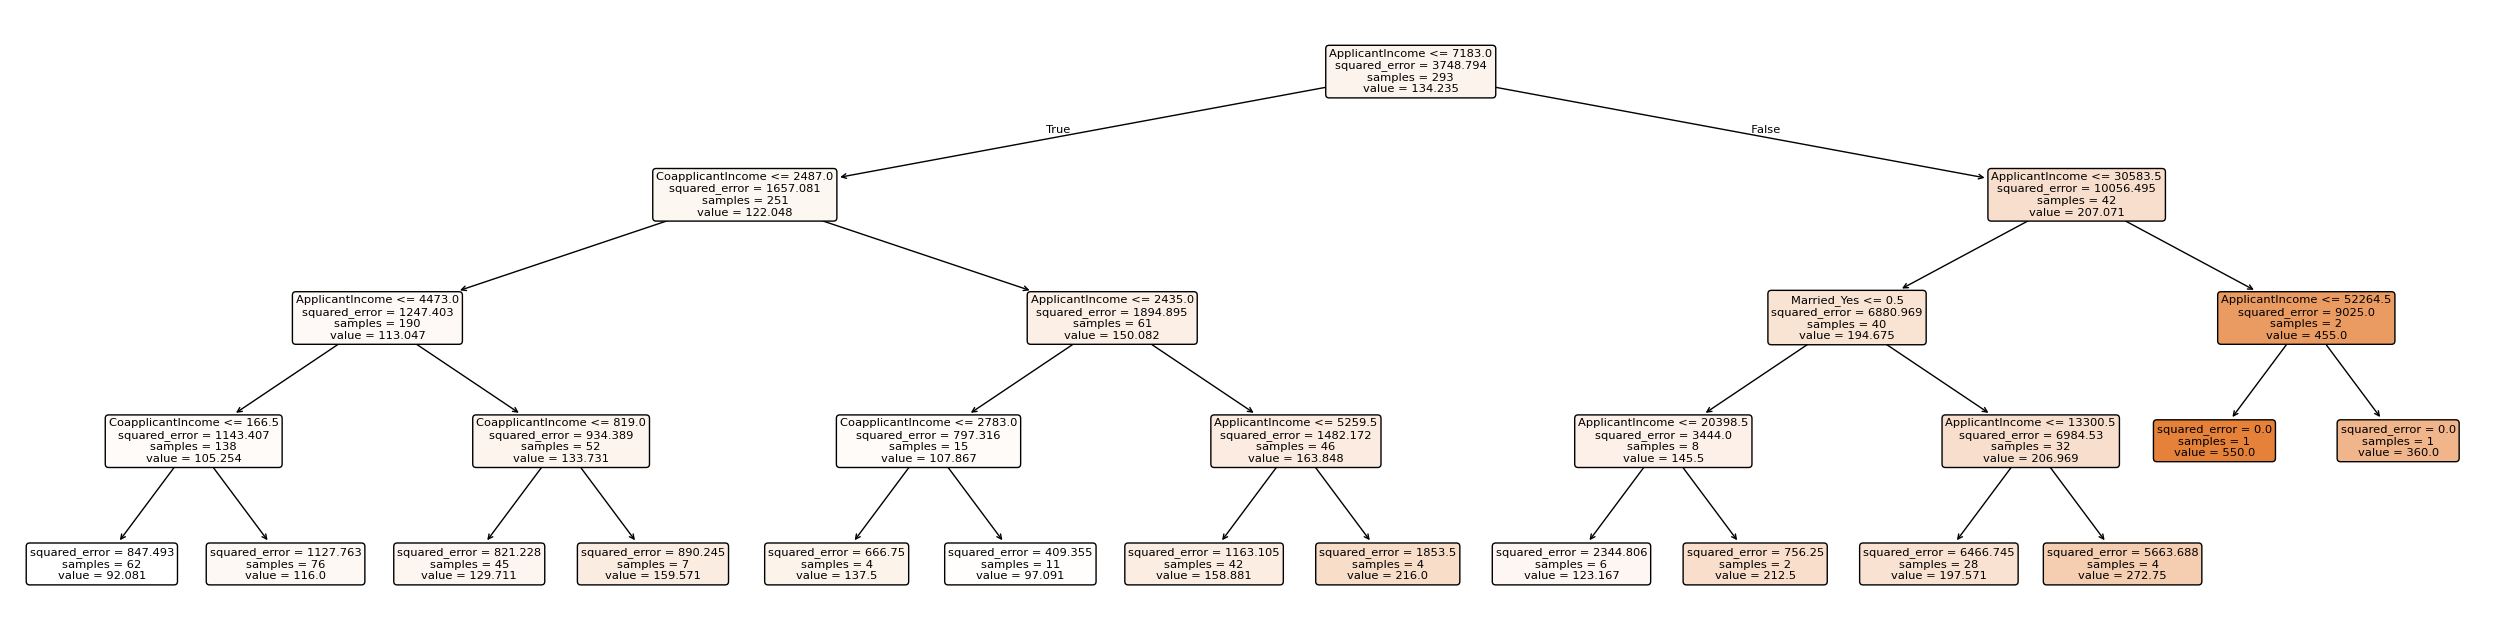


Feature Importance:
               Feature  Importance
7     ApplicantIncome    0.815141
8   CoapplicantIncome    0.146731
3         Married_Yes    0.038129
0       Gender_Female    0.000000
1  Education_Graduate    0.000000
4      LoanAmountTerm    0.000000
2    SelfEmployed_Yes    0.000000
6  UrbanSemiurban_Yes    0.000000
5       CreditHistory    0.000000


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Features to use in the model.
X = df[["Gender_Female",
        "Education_Graduate",
        "SelfEmployed_Yes",
        "Married_Yes",
        "LoanAmountTerm",
        "CreditHistory",
        "UrbanSemiurban_Yes",
        "ApplicantIncome",
        "CoapplicantIncome"]]
y = df["LoanAmount"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)

# # Evaluate decision tree accuracy on the training data.
# print("Accuracy for Training Data:")
# y_pred_train = model.predict(X_train)
# print("* Accuracy:", accuracy_score(y_train, y_pred_train))
# print("* Classification Report:\n", classification_report(y_train, y_pred_train))

# print()

# # Evaluate decision tree accuracy on the testing data.
# print("Accuracy for Testing Data:")
# y_pred_test = model.predict(X_test)
# print("* Accuracy:", accuracy_score(y_test, y_pred_test))
# print("* Classification Report:\n", classification_report(y_test, y_pred_test))

In [145]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Financial Features</h3>")

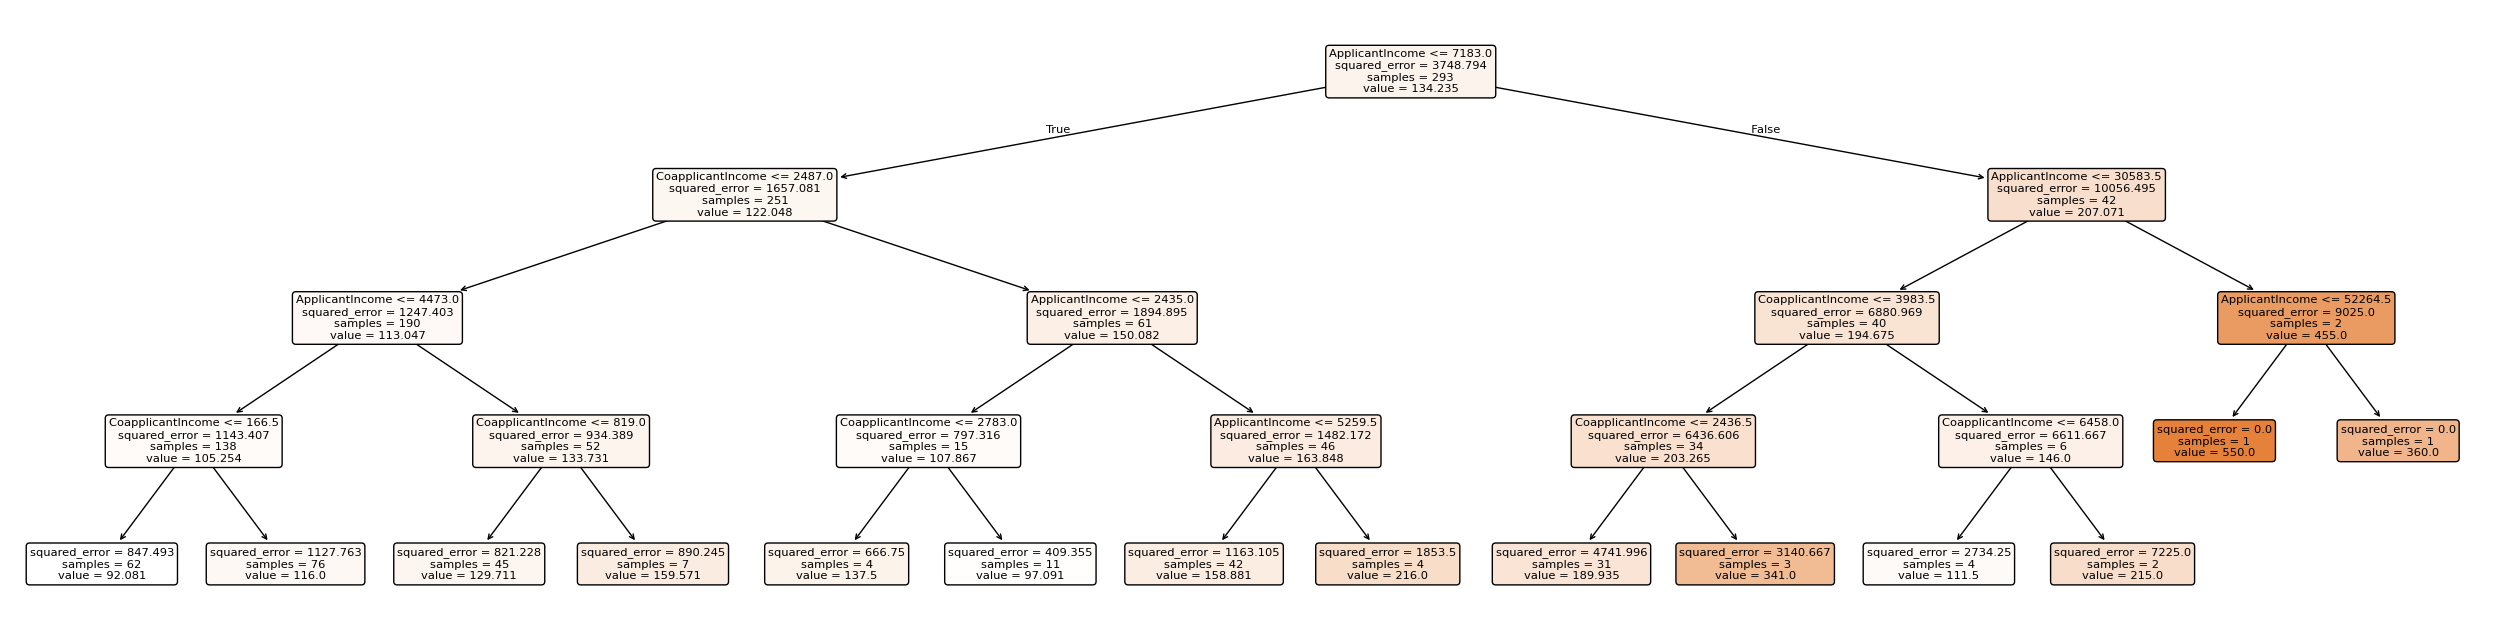


Feature Importance:
              Feature  Importance
1    ApplicantIncome     0.72237
2  CoapplicantIncome     0.27763
0      CreditHistory     0.00000


In [148]:
# Features to use in the model.
X = df[["CreditHistory",
        "ApplicantIncome",
        "CoapplicantIncome"]]
y = df["LoanAmount"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)

In [146]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Demographic Features</h3>")

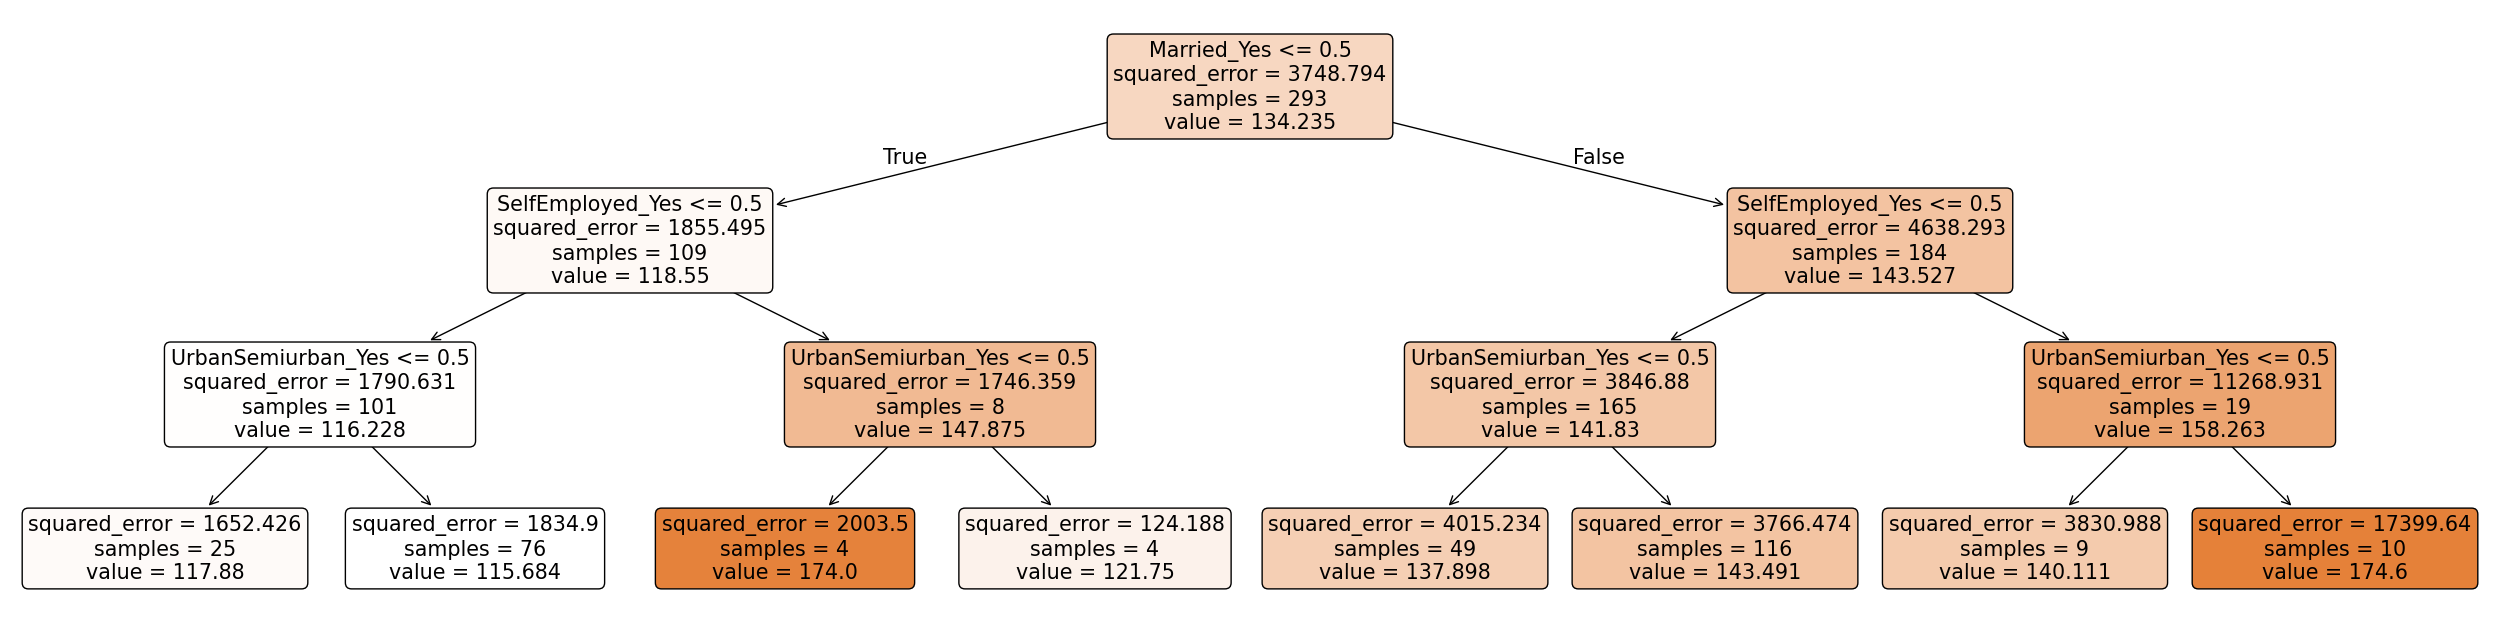


Feature Importance:
               Feature  Importance
3         Married_Yes    0.637436
4  UrbanSemiurban_Yes    0.183057
2    SelfEmployed_Yes    0.179508
0       Gender_Female    0.000000
1  Education_Graduate    0.000000


In [147]:
# Features to use in the model.
X = df[["Gender_Female",
        "Education_Graduate",
        "SelfEmployed_Yes",
        "Married_Yes",
        "UrbanSemiurban_Yes"]]
y = df["LoanAmount"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)